## Loading the data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [95]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [96]:
data['year'] = data['month'].str[:4]

In [97]:
data['year'] = data['year'].astype(int)
data = data[(data['year'] >= 2019) & (data['year'] <= 2022)]

In [98]:
data = data[~data['flat_type'].isin(['EXECUTIVE', 'MULTI-GENERATION'])]

In [99]:
data = data[~data['town'].isin(['CENTRAL AREA', 'BUKIT TIMAH'])]

In [100]:
data['price_per_sqm']=data['resale_price']/data['floor_area_sqm']

In [101]:
data = data.drop(['storey_range', 'flat_model', 'resale_price', 'floor_area_sqm'], axis=1)

In [102]:
data['remaining_lease'] = (99 + data['lease_commence_date']) - data['year']

Since we are interested in the distance from the MRT station, we need the geolocations of the HDBs as well as MRT stations.

A quick search on Google gives us [this](https://www.kaggle.com/datasets/mylee2009/singapore-postal-code-mapper) publicly available dataset on Kaggle. We have downloaded this dataset and pre-processed it for you. *(To get a taste of preprocessing, you can try downloading it and cleaning it. You will realise that it is not a obvious task to even understand why cleaning is needed at the outset. You will have to really dive deeper to understand it.)*

- Load this dataset in a dataframe `hdb_locations`.
- Create a new dataframe, named `imputed_dataset`, by merging `hdb_locations` dataset with our `resale_dataset`. (Validate that the `imputed_dataset` has as many records as the `resale_dataset`.)
- Drop all records with NaN values in the `imputed_dataset`. They are manifested due to incomplete `hdb_locations` dataset. We are okay to sacrifice a few records.

<div align="right"> (3 points) </div>

In [103]:
imputed_dataset.head()

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,Unnamed: 0,postal,lat,lng,searchval,building,address,postal.1,nearest_mrt,mrt_dist
0,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,9369.0,560225.0,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225.0,Ang Mo Kio,1.305064
1,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3916.666667,15325.0,560174.0,1.375097,103.837619,KEBUN BARU LINK 1,KEBUN BARU LINK 1,174 ANG MO KIO AVE 4 KEBUN BARU LINK 1 SINGAPO...,560174.0,Yio Chu Kang,1.099846
2,2019-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59,2019,3552.238806,9380.0,560440.0,1.366428,103.854311,HDB-ANG MO KIO,HDB-ANG MO KIO,440 ANG MO KIO AVE 10 HDB-ANG MO KIO SINGAPORE...,560440.0,Ang Mo Kio,0.660277
3,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3934.426230,15325.0,560174.0,1.375097,103.837619,KEBUN BARU LINK 1,KEBUN BARU LINK 1,174 ANG MO KIO AVE 4 KEBUN BARU LINK 1 SINGAPO...,560174.0,Yio Chu Kang,1.099846
4,2019-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60,2019,3529.411765,25072.0,560637.0,1.380362,103.842335,YIO CHU KANG HTS,YIO CHU KANG HTS,637 ANG MO KIO AVE 6 YIO CHU KANG HTS SINGAPOR...,560637.0,Yio Chu Kang,0.327414


In [104]:
hdb_locations = pd.read_csv('sg_zipcode_mapper_utf.csv')

In [105]:
# 检查hdb_locations中'block'和'street_name'组合的唯一性
duplicate_rows = hdb_locations.duplicated(subset=['block', 'street_name'], keep=False)
if duplicate_rows.any():
    print("there is repeated values")
    # 可以选择去除重复，或者根据业务逻辑进行处理
    hdb_locations = hdb_locations.drop_duplicates(subset=['block', 'street_name'], keep='first')
else:
    print("no repeated values")


there is repeated values


In [106]:
imputed_dataset = pd.merge(data, hdb_locations, on=['block', 'street_name'], how='left')

In [107]:
assert len(imputed_dataset) == len(data), "The number of records in imputed_dataset does not match resale_dataset."

In [108]:
imputed_dataset = imputed_dataset.dropna()

## Question 3: Finding the Nearest MRT station

We need geolocations of the MRT stations to locate the nearest station to the HDB. A quick search on Google gives us [this](https://www.kaggle.com/datasets/yxlee245/singapore-train-station-coordinates) publicly available dataset on Kaggle. We have downloaded the dataset for you. We have dropped the stations on LRT.

In [109]:
mrt_locations = pd.read_csv("mrt_data.csv")
mrt_locations.drop(columns=['type'], inplace=True)

In [110]:
mrt_locations.head()

,station_name,lat,lng
0,Jurong East,1.333207,103.742308
1,Bukit Batok,1.349069,103.749596
2,Bukit Gombak,1.359043,103.751863
3,Choa Chu Kang,1.385417,103.744316
4,Yew Tee,1.397383,103.747523


Using Euclidean distance between two geolocation offers us a false notion of the distance. Euclidean distance is meant for the flat space; which Earth isn't (thanks to Greek geographer Eratosthenes!).

We have provided you the following function to compute the distance between to geolocations.

In [111]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):

  # Approximate radius of earth in km
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def euclidean_distance(x, y):
  dx = x[0] - y[0]
  dy = x[1] - y[1]

  return sqrt(dx**2 + dy**2)

jurong_east = [1.333207, 103.742308]
near_amk = [1.365445, 103.842715]
print("Euclidean distance: ", euclidean_distance(jurong_east, near_amk))
print("Realistic distance: ", earth_distance(jurong_east, near_amk))

Euclidean distance:  0.10545546118149039
Realistic distance:  11.726844638513933


In [112]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [113]:
# mrt_labels
mrt_labels = mrt_locations['station_name'].values

# mrt_features
mrt_features = mrt_locations[['lat', 'lng']].values

# house_features
house_features = imputed_dataset[['lat', 'lng']].values

In [114]:
knn = KNeighborsClassifier(n_neighbors=1,metric=earth_distance)
knn.fit(mrt_features, mrt_labels)

KNeighborsClassifier(metric=<function earth_distance at 0x2842bcaf0>,
                     n_neighbors=1)

In [115]:
nearest_stations = knn.predict(house_features)

/Users/weixiaochen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [116]:
imputed_dataset['nearest_mrt'] = nearest_stations

In [120]:
imputed_dataset.head()

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,Unnamed: 0,postal,lat,lng,searchval,building,address,postal.1,nearest_mrt,mrt_dist
0,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,9369.0,560225.0,1.367396,103.838150,HDB-ANG MO KIO,HDB-ANG MO KIO,225 ANG MO KIO AVE 1 HDB-ANG MO KIO SINGAPORE ...,560225.0,Ang Mo Kio,1.305064
1,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3916.666667,15325.0,560174.0,1.375097,103.837619,KEBUN BARU LINK 1,KEBUN BARU LINK 1,174 ANG MO KIO AVE 4 KEBUN BARU LINK 1 SINGAPO...,560174.0,Yio Chu Kang,1.099846
2,2019-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59,2019,3552.238806,9380.0,560440.0,1.366428,103.854311,HDB-ANG MO KIO,HDB-ANG MO KIO,440 ANG MO KIO AVE 10 HDB-ANG MO KIO SINGAPORE...,560440.0,Ang Mo Kio,0.660277
3,2019-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3934.426230,15325.0,560174.0,1.375097,103.837619,KEBUN BARU LINK 1,KEBUN BARU LINK 1,174 ANG MO KIO AVE 4 KEBUN BARU LINK 1 SINGAPO...,560174.0,Yio Chu Kang,1.099846
4,2019-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60,2019,3529.411765,25072.0,560637.0,1.380362,103.842335,YIO CHU KANG HTS,YIO CHU KANG HTS,637 ANG MO KIO AVE 6 YIO CHU KANG HTS SINGAPOR...,560637.0,Yio Chu Kang,0.327414


In [118]:
distances = []
for index, row in imputed_dataset.iterrows():
    station_name=row['nearest_mrt']
    station_info = mrt_locations[mrt_locations['station_name'] == station_name].iloc[0]
    station_lat = station_info['lat']
    station_lon = station_info['lng']
    x=[station_lat,station_lon]
    y=[row['lat'],row['lng']]
    dis=earth_distance(x, y)
    distances.append(dis)

In [119]:
imputed_dataset['mrt_dist']=distances

## Question 4: Data Visualisation

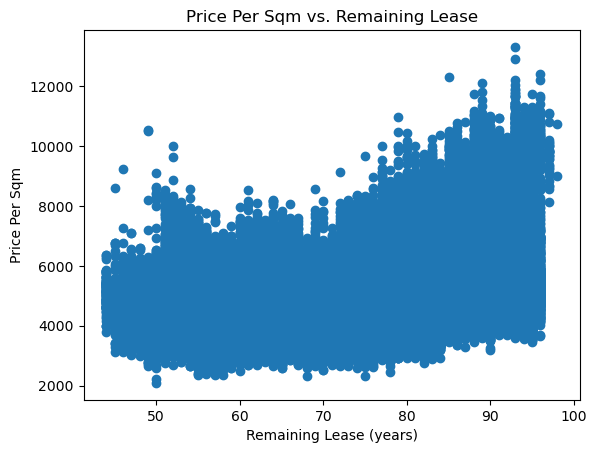

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(imputed_dataset['remaining_lease'], imputed_dataset['price_per_sqm'])

plt.title('Price Per Sqm vs. Remaining Lease')
plt.xlabel('Remaining Lease (years)')
plt.ylabel('Price Per Sqm')

plt.show()


We also want to see the variation of resale price across different towns.

Write a script that shows the boxplot of `price_per_sqm` against varius `town`s. All towns should be listed in alphabetical order on the x-axis.

<div align="right"> (1 point) </div>

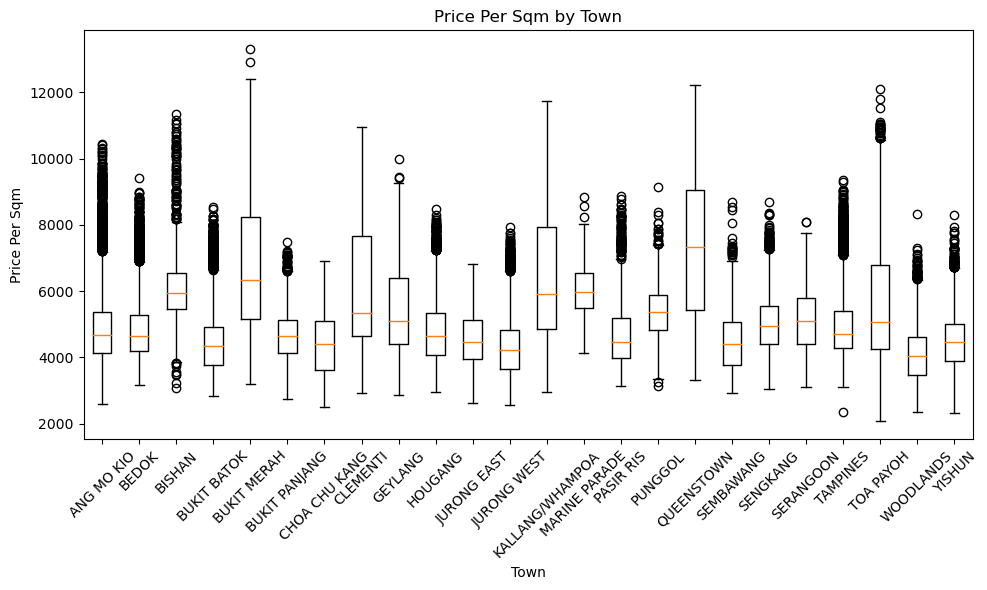

In [77]:
imputed_dataset_sorted = imputed_dataset.sort_values(by='town')


plt.figure(figsize=(10, 6)) 
plt.boxplot([group["price_per_sqm"] for name, group in imputed_dataset_sorted.groupby('town')], labels=imputed_dataset_sorted['town'].unique())


plt.title('Price Per Sqm by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm')
plt.xticks(rotation=45)  


plt.tight_layout()  
plt.show()

We want to observe the number of different `flat_type` that are sold over the last four years.

Write a script that would generate a plot that looks as follows.

<div align="right"> (2 points) </div>

<img src="https://www.comp.nus.edu.sg/~ashishd/IT5006/Assignments/Assignment_1/flat_type.png" alt="flat_type" width="500"/>

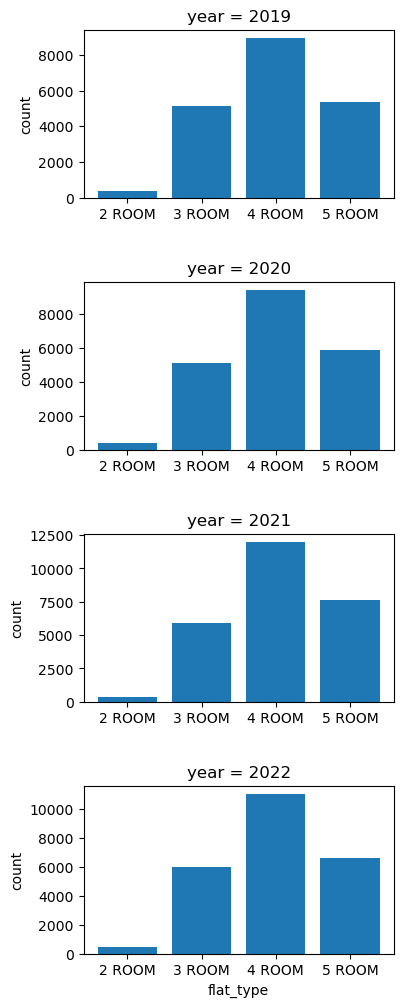

In [86]:
years = [2019, 2020, 2021, 2022]
data_filtered = imputed_dataset[imputed_dataset['year'].isin(years)]

# Create subplots for each year
fig, axs = plt.subplots(len(years), 1, figsize=(4, 12))

# Create a bar plot for each year
for i, year in enumerate(years):
    # Filter data for the specific year
    data_year = data_filtered[data_filtered['year'] == year]
    
    # Count the occurrences of each flat_type
    counts = data_year['flat_type'].value_counts().sort_index()
    
    # Plotting
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f'year = {year}')
    axs[i].set_ylabel('count')
    axs[i].set_xlabel('flat_type')
    if i < len(years) - 1:
        axs[i].set_xlabel('')
    else:
        axs[i].set_xlabel('flat_type')
   

plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

/var/folders/bw/873390812n94kxhtk6pxt9240000gn/T/ipykernel_12811/315892233.py:43: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


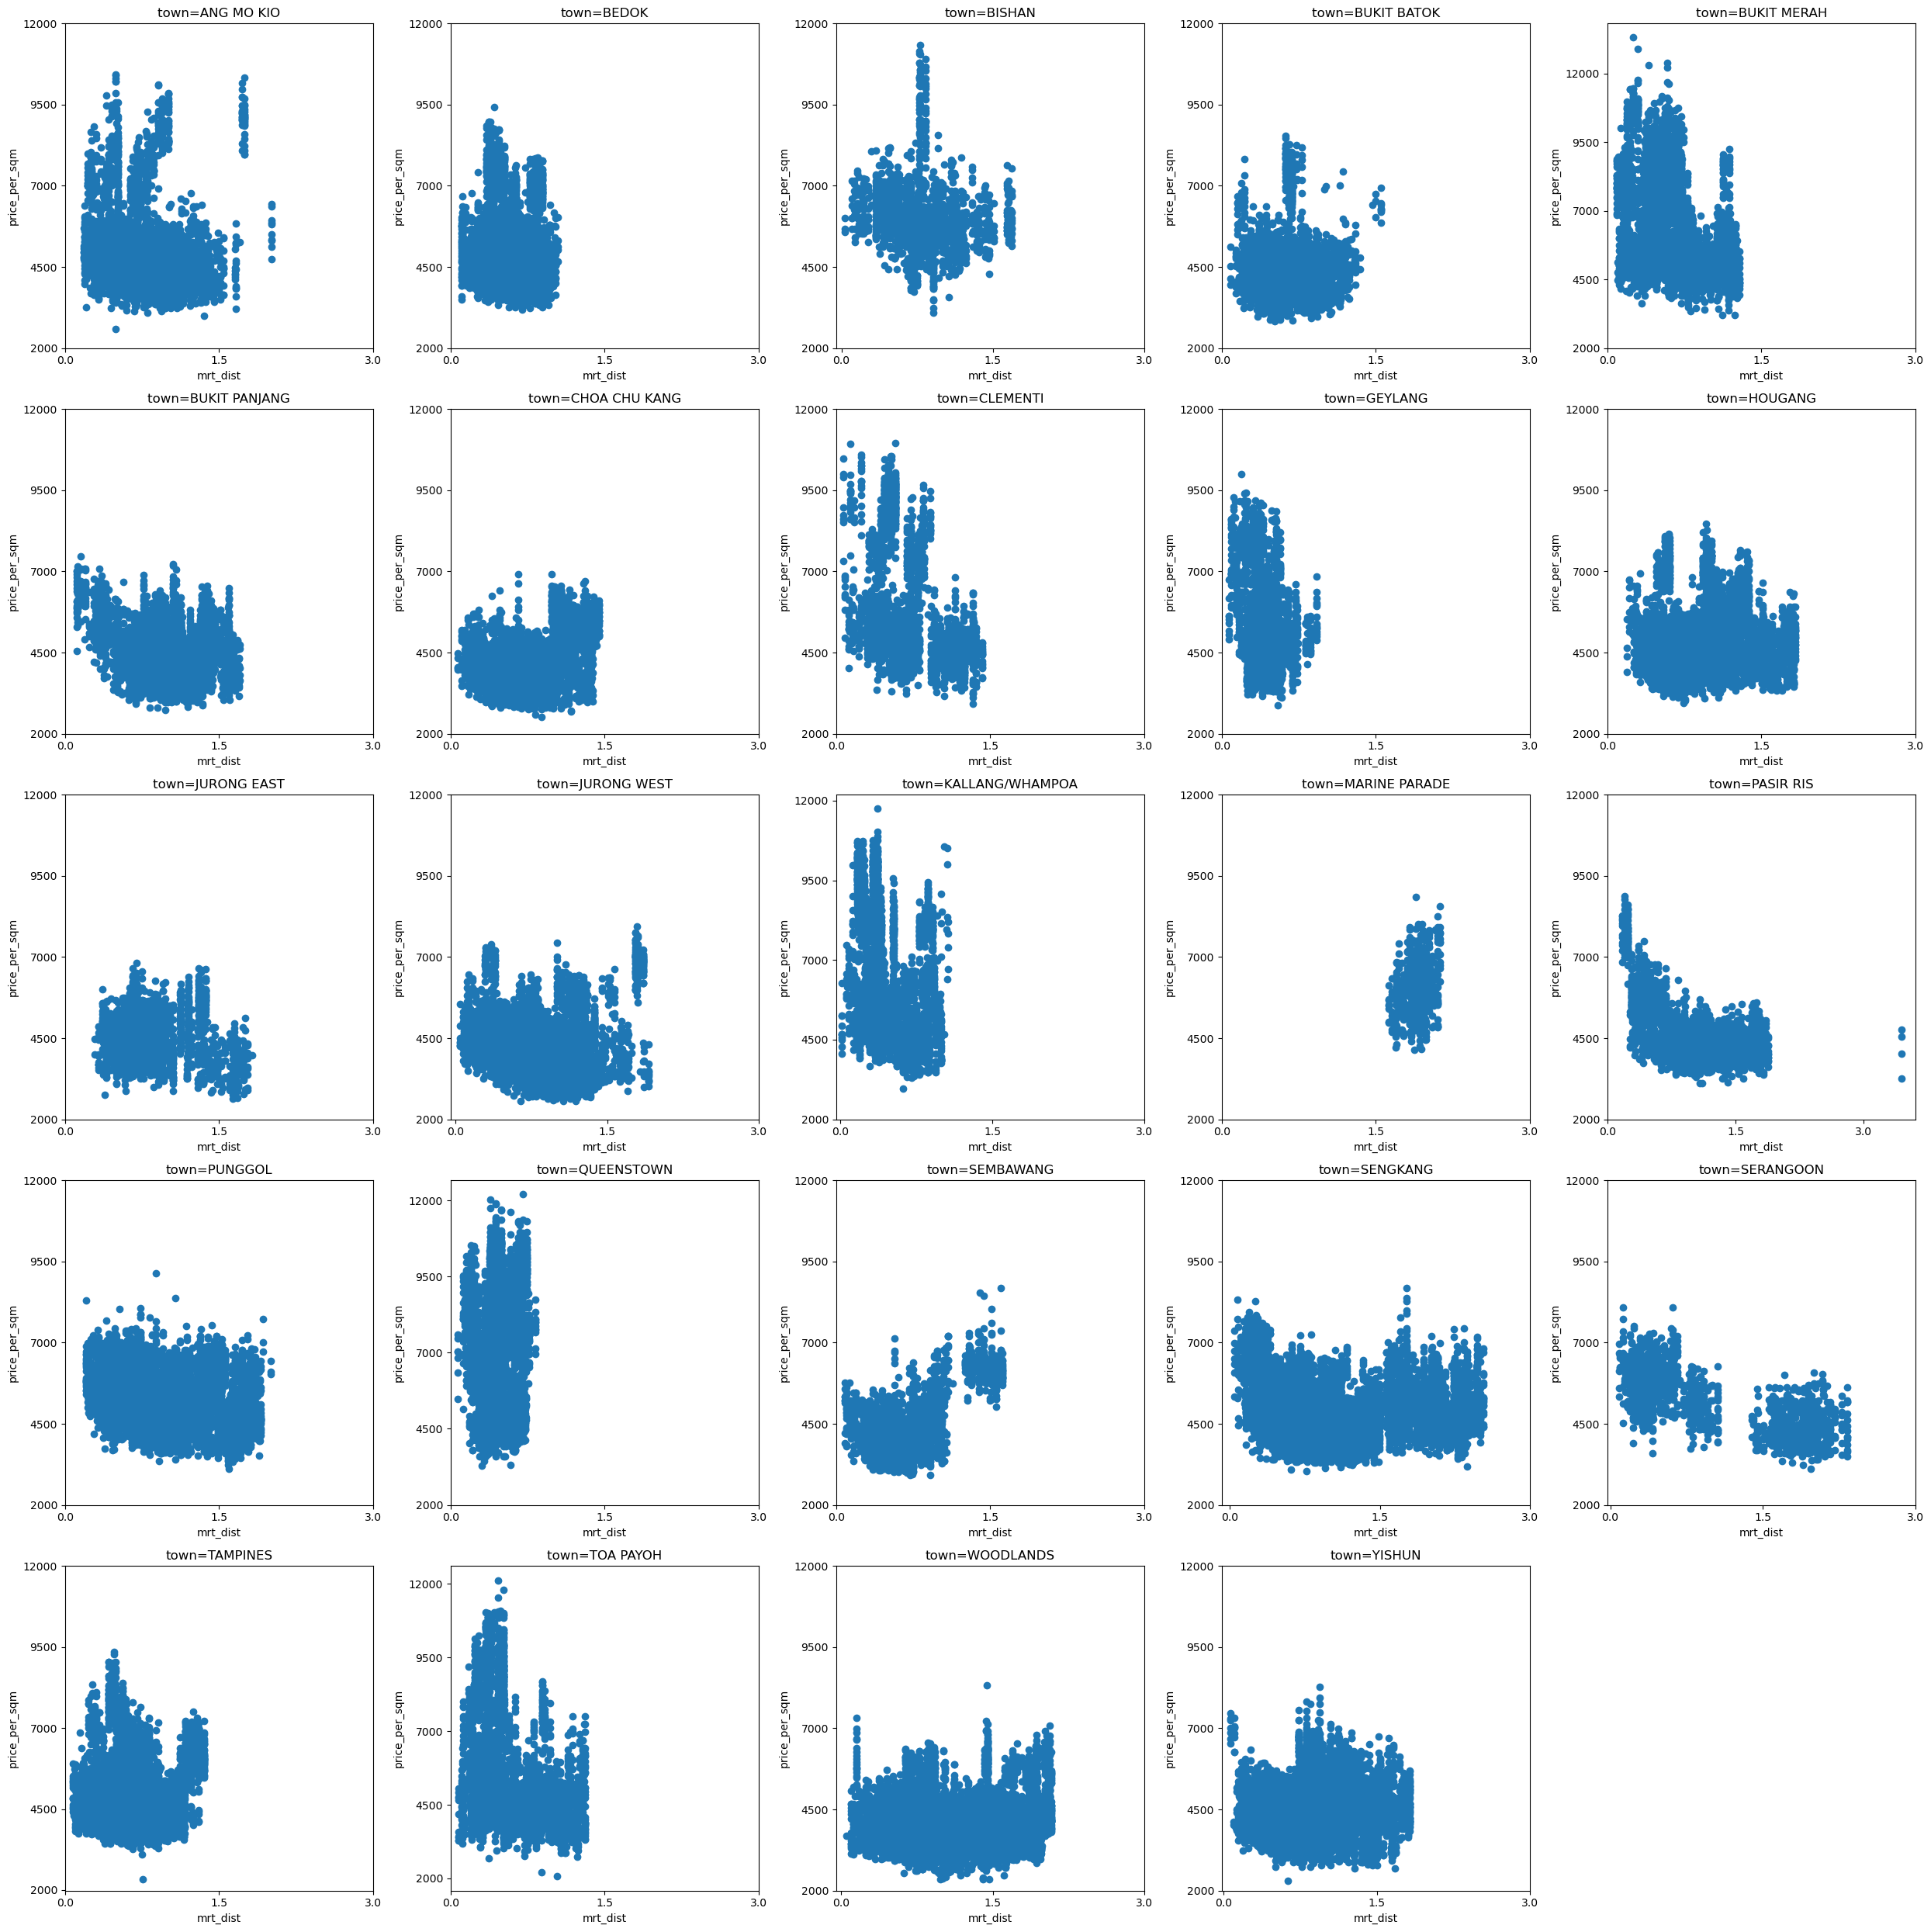

In [90]:
# 获取独特的town列表
towns = imputed_dataset['town'].unique()

# 计算子图的行数和列数，这里我们尝试创建一个平衡的网格
n = len(towns)
ncols = 5
nrows = n // ncols + (n % ncols > 0)

# 创建子图
fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows), constrained_layout=True)

# 如果只有一个子图，将axs转换为列表以方便迭代
if n == 1:
    axs = [axs]

# 为了在迭代中保持一致性，将axs转换为一维数组
axs = axs.flatten()

x_ticks = np.linspace(0, 3, num=3) # 比如这里分成5个刻度
y_ticks = np.linspace(2000, 12000, num=5) # 同上

# 绘制每个town的散点图
for i, town in enumerate(towns):
    # 筛选当前town的数据
    town_data = imputed_dataset[imputed_dataset['town'] == town]
    axs[i].scatter(town_data['mrt_dist'], town_data['price_per_sqm'])
    
    # 设置标题
    axs[i].set_title('town='+town)
    
    # 设置x轴和y轴的标签
    axs[i].set_xlabel('mrt_dist')
    axs[i].set_ylabel('price_per_sqm')
    
    axs[i].set_xticks(x_ticks)
    axs[i].set_yticks(y_ticks)

# 隐藏剩余的子图（如果有的话）
for ax in axs[n:]:
    ax.set_visible(False)

# 调整子图布局
plt.tight_layout()

# 显示图表
plt.show()